In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

# Load the dataset
file_path = 'C:\\Users\\AkankshaAmarendra\\Downloads\\LossfromData\\LossFromNetCrime.csv'
df = pd.read_csv(file_path, encoding='ascii')

# Display the first few rows of the dataset
df.head()

,Country,2019_Complaints,2019_Losses,2020_Complaints,2020_Losses,2021_Complaints,2021_Losses,2022_Complaints,2022_Losses,2023_Complaints,2023_Losses,2024_Complaints,2024_Losses
0,PR,655,5929974,1338,7209755,1785,9463928,1594,17211758,1817,21018302,1974,31545772
1,PS,1784,22483591,2890,25423219,3352,48918464,3210,57796003,3378,69292891,3811,66002407
2,PT,1119,13870074,2020,12391290,2102,18205913,1918,30859319,2178,28700418,2209,40192274
3,PY,1913,10967865,2992,13815152,3188,26677869,3768,40114594,3487,33579643,2678,45168957
4,AE,5503,48101706,7390,81178182,10164,131934602,10042,187062157,11034,244238485,12071,280815215


In [2]:
df.isnull().sum()

# Check data types
df.dtypes

# Convert columns to appropriate data types if necessary
# In this case, all columns seem to be correctly typed as integers or strings

# Display basic statistics
df.describe()

,2019_Complaints,2019_Losses,2020_Complaints,2020_Losses,2021_Complaints,2021_Losses,2022_Complaints,2022_Losses,2023_Complaints,2023_Losses,2024_Complaints,2024_Losses
count,117.000000,1.170000e+02,117.000000,1.170000e+02,117.000000,1.170000e+02,117.000000,1.170000e+02,117.000000,1.170000e+02,117.000000,1.170000e+02
mean,24650.376068,2.366370e+08,43248.495726,2.811822e+08,45730.709402,4.712803e+08,42983.982906,7.195547e+08,45504.658120,8.589947e+08,50733.811966,1.013898e+09
std,63976.713094,5.087247e+08,112412.520213,6.039114e+08,125357.179585,1.042951e+09,112053.590595,1.565846e+09,116211.486494,1.924353e+09,133450.368631,2.229037e+09
min,216.000000,2.498015e+06,362.000000,2.673181e+06,391.000000,4.362630e+06,458.000000,6.648059e+06,400.000000,8.907146e+06,330.000000,9.792860e+06
25%,1119.000000,1.178608e+07,1937.000000,1.381515e+07,2102.000000,2.286356e+07,1918.000000,3.349522e+07,2280.000000,4.131506e+07,2253.000000,4.787657e+07
50%,5156.000000,4.571394e+07,8187.000000,4.528639e+07,9415.000000,1.000420e+08,8819.000000,1.276494e+08,9527.000000,1.631447e+08,9251.000000,1.875518e+08
75%,16525.000000,2.024625e+08,28232.000000,2.125291e+08,30367.000000,4.003433e+08,29642.000000,6.054526e+08,31255.000000,6.420981e+08,31525.000000,8.030187e+08
max,449305.000000,3.302745e+09,796395.000000,3.906715e+09,940125.000000,6.466619e+09,769205.000000,1.030439e+10,876894.000000,1.191678e+10,946966.000000,1.445701e+10


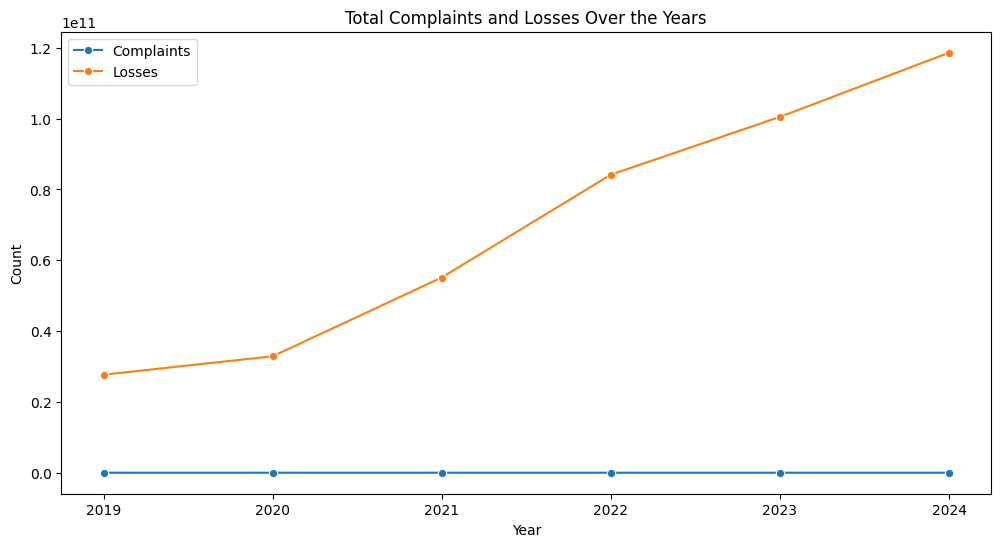

In [3]:
# Plot the total number of complaints and losses over the years
years = ['2019', '2020', '2021', '2022', '2023', '2024']
complaints_cols = [f'{year}_Complaints' for year in years]
losses_cols = [f'{year}_Losses' for year in years]

# Sum complaints and losses for each year
total_complaints = df[complaints_cols].sum()
total_losses = df[losses_cols].sum()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=years, y=total_complaints, marker='o', label='Complaints')
sns.lineplot(x=years, y=total_losses, marker='o', label='Losses')
plt.title('Total Complaints and Losses Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.show()

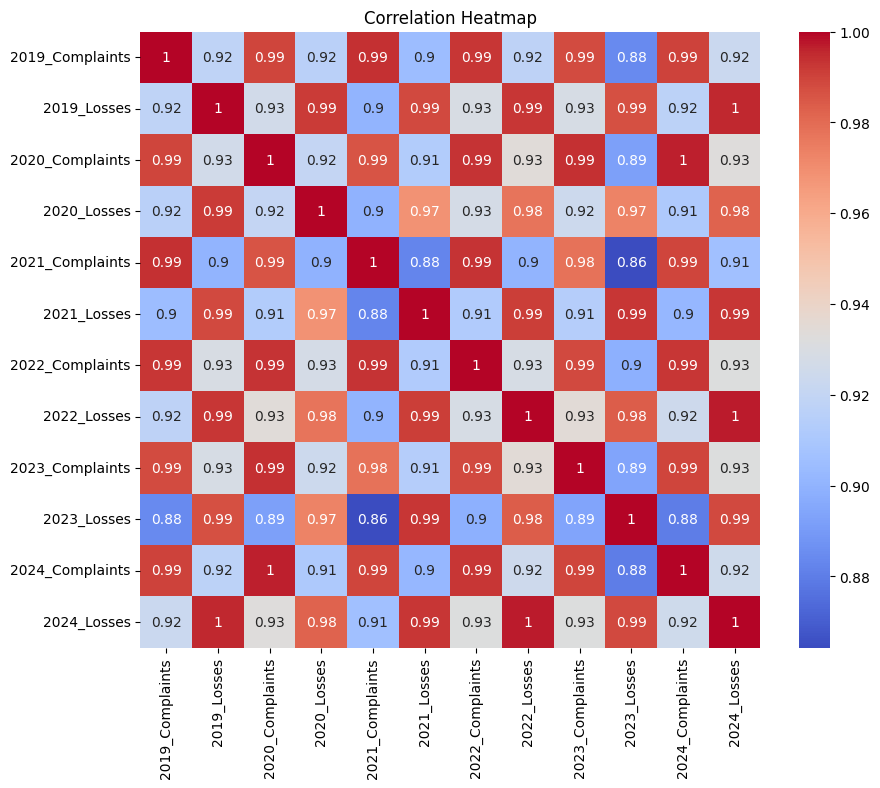

In [4]:
# Correlation heatmap for numeric columns
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [5]:
# Prepare the data for modeling
X = df[complaints_cols].values.reshape(-1, 1)
y = df[losses_cols].values.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(3.2802392558015763e+17, 0.6800939444768945)